# Stanford Open Policing Project - Rhode Island analysis

## Read into a pandas dataframe the police.csv file located here:
https://assets.datacamp.com/production/repositories/1497/datasets/62bd9feef451860db02d26553613a299721882e8/police.csv

In [1]:
# Import dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read in the csv file
ri = pd.read_csv('https://assets.datacamp.com/production/repositories/1497/datasets/62bd9feef451860db02d26553613a299721882e8/police.csv')


In [3]:
# Look at the head
ri.head(3)

,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,2005-01-04,12:55,NaN,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,RI,2005-01-23,23:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,RI,2005-02-17,04:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4


### Examining the data
Each row represents one traffic stop

We first notice that 'county_name' and 'search_type' have lots of NaN values
To get a better idea of where the NaN values are in the dataset we can use the .isnull() method chained with .sum() to find the count of NaN values in each column and compare that to the .shape of the dataframe

In [4]:
ri.shape

(91741, 15)

In [5]:
ri.isnull().sum()

state                     0
stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64

From this we see that there are 91741 rows in the dataset
Also we note that the 'county_name' column has that many missing values - so it can be safely dropped
Since we are only interested in the state of Rhode Island, the 'state' column is of no use so we can drop it as well

In [6]:
ri.drop(['county_name','state'], axis='columns', inplace=True)

The 'driver_gender' will be critical to our analysis because we are interested in the impact of gender on traffic stops. Since we have 5205 missing values out of 91741 (5.7%) we can drop any specific rows that have this column as a missing value

In [7]:
ri.dropna(subset=['driver_gender'], inplace=True)
ri.isnull().sum()

stop_date                 0
stop_time                 0
driver_gender             0
driver_race               0
violation_raw             0
violation                 0
search_conducted          0
search_type           83229
stop_outcome              0
is_arrested               0
stop_duration             0
drugs_related_stop        0
district                  0
dtype: int64

# Cleaning the dataset data types

In [8]:
ri.head()

,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


In [9]:
# Let's look at the dtype of each column
ri.dtypes

stop_date             object
stop_time             object
driver_gender         object
driver_race           object
violation_raw         object
violation             object
search_conducted        bool
search_type           object
stop_outcome          object
is_arrested           object
stop_duration         object
drugs_related_stop      bool
district              object
dtype: object

In looking at the values from the .head() method we see that there are many columns in this dataset that appear to have the wrong data type. We can change them by using the .astype() method.

In [10]:
# The values of 'is_arrested' are True/False so we need to recast this column's datatype
ri['is_arrested'] = ri.is_arrested.astype('bool')

In [11]:
ri.is_arrested.dtype

dtype('bool')

The next obvious column that needs to be addressed is the stop_date and stop_time columns.
We want to combine these two columns into a single datetime column, recast as a 'datetime' dtype and then set it as the index of the dataframe

In [12]:
combined = ri.stop_date.str.cat(ri.stop_time, sep=' ')
ri['date_and_time'] = pd.to_datetime(combined)
ri.set_index('date_and_time', inplace=True)

In [13]:
ri.index

DatetimeIndex(['2005-01-04 12:55:00', '2005-01-23 23:15:00',
               '2005-02-17 04:15:00', '2005-02-20 17:15:00',
               '2005-02-24 01:20:00', '2005-03-14 10:00:00',
               '2005-03-29 21:55:00', '2005-04-04 21:25:00',
               '2005-07-14 11:20:00', '2005-07-14 19:55:00',
               ...
               '2015-12-31 13:23:00', '2015-12-31 18:59:00',
               '2015-12-31 19:13:00', '2015-12-31 20:20:00',
               '2015-12-31 20:50:00', '2015-12-31 21:21:00',
               '2015-12-31 21:59:00', '2015-12-31 22:04:00',
               '2015-12-31 22:09:00', '2015-12-31 22:47:00'],
              dtype='datetime64[ns]', name='date_and_time', length=86536, freq=None)

In [14]:
ri.columns

Index(['stop_date', 'stop_time', 'driver_gender', 'driver_race',
       'violation_raw', 'violation', 'search_conducted', 'search_type',
       'stop_outcome', 'is_arrested', 'stop_duration', 'drugs_related_stop',
       'district'],
      dtype='object')

In [15]:
ri.head()

,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
date_and_time,,,,,,,,,,,,,
2005-01-04 12:55:00,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
2005-01-23 23:15:00,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2005-02-17 04:15:00,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
2005-02-20 17:15:00,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
2005-02-24 01:20:00,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


# Explore the relationship between gender and policing

Before comparing the violations being committed by each gender, we will examine the violations committed by all drivers to get a baseline understanding of the data.

### violation column

In [16]:
ri.violation.value_counts()

Speeding               48423
Moving violation       16224
Equipment              10921
Other                   4409
Registration/plates     3703
Seat belt               2856
Name: violation, dtype: int64

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Equipment'),
  Text(1, 0, 'Speeding'),
  Text(2, 0, 'Other'),
  Text(3, 0, 'Moving violation'),
  Text(4, 0, 'Registration/plates'),
  Text(5, 0, 'Seat belt')])

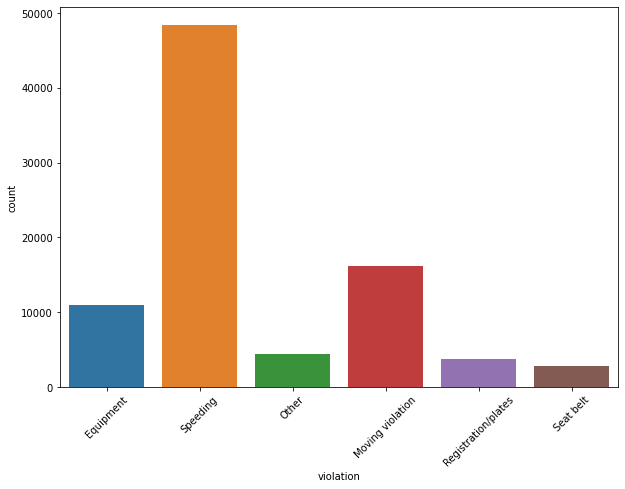

In [17]:
fig, ax = plt.subplots(figsize=(10,7))
sns.countplot(x=ri.violation, data=ri)
plt.xticks(rotation=45)

In [18]:
# Looking at this instead by proportions using the normalize=True parameter
ri.violation.value_counts(normalize=True)

Speeding               0.559571
Moving violation       0.187483
Equipment              0.126202
Other                  0.050950
Registration/plates    0.042791
Seat belt              0.033004
Name: violation, dtype: float64

## Create separate dataframes for each gender and analyze

In [19]:
# Create a DataFrame of female drivers
female = ri[ri['driver_gender'] == 'F']

# Create a DataFrame of male drivers
male = ri[ri['driver_gender'] == 'M']

In [20]:
# Compute the violations by female drivers (as proportions)
print(female.violation.value_counts(normalize=True))

Speeding               0.658114
Moving violation       0.138218
Equipment              0.105199
Registration/plates    0.044418
Other                  0.029738
Seat belt              0.024312
Name: violation, dtype: float64


In [21]:
# Compute the violations by male drivers (as proportions)
print(male.violation.value_counts(normalize=True))

Speeding               0.522243
Moving violation       0.206144
Equipment              0.134158
Other                  0.058985
Registration/plates    0.042175
Seat belt              0.036296
Name: violation, dtype: float64


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Equipment'),
  Text(1, 0, 'Speeding'),
  Text(2, 0, 'Other'),
  Text(3, 0, 'Moving violation'),
  Text(4, 0, 'Registration/plates'),
  Text(5, 0, 'Seat belt')])

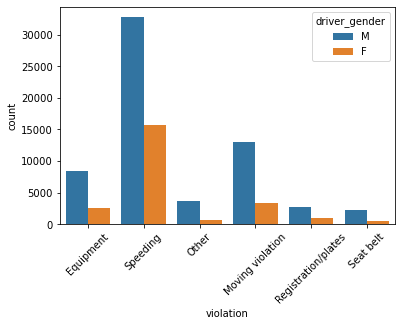

In [30]:
sns.countplot(x='violation', hue='driver_gender', data=ri)
plt.xticks(rotation=45)

## Let's further explore 'Speeding' with respect to gender

In [23]:
# Create a DataFrame of female drivers stopped for speeding
female_and_speeding = ri[(ri['driver_gender'] == 'F') & (ri['violation'] == 'Speeding')]

# Create a DataFrame of male drivers stopped for speeding
male_and_speeding = ri[(ri['driver_gender'] == 'M') & (ri['violation'] == 'Speeding')]

In [24]:
# Compute the stop outcomes for female drivers (as proportions)
print(female_and_speeding.stop_outcome.value_counts(normalize=True))

Citation            0.952192
Warning             0.040074
Arrest Driver       0.005752
N/D                 0.000959
Arrest Passenger    0.000639
No Action           0.000383
Name: stop_outcome, dtype: float64


In [25]:
# Compute the stop outcomes for male drivers (as proportions)
print(male_and_speeding.stop_outcome.value_counts(normalize=True))

Citation            0.944595
Warning             0.036184
Arrest Driver       0.015895
Arrest Passenger    0.001281
No Action           0.001068
N/D                 0.000976
Name: stop_outcome, dtype: float64


In [108]:
# We can do the same as above by using a groupby to create a dataframe that can be easily plotted
perct_gender_stop_outcome = (
    ri.groupby('driver_gender')['stop_outcome']
    # use value_counts() because we can normalize - .size() doesn't have this feature
    .value_counts(normalize=True)
    # rename the series created by the groupby
   .rename('percentage')
    # change the values to be percentages between 0-100%
   .mul(100)
    # change groupby series object into a dataframe
   .reset_index()
   # sort the percentage column in descending order
   .sort_values('percentage', ascending=False))

In [109]:
perct_gender_stop_outcome.head()

,driver_gender,stop_outcome,percentage
0,F,Citation,89.387566
6,M,Citation,88.971033
1,F,Warning,6.246320
7,M,Warning,5.817214
8,M,Arrest Driver,3.471846


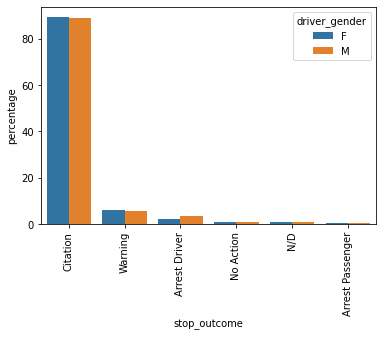

In [110]:
p = sns.barplot(x="stop_outcome", y="percentage", hue="driver_gender", data=perct_gender_stop_outcome)
_ = plt.setp(p.get_xticklabels(), rotation=90)

#### Gender does not seem to make a difference in stop_outcome

# Let's explore 'searched' with respect to gender

In [130]:
ri.head()

,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
date_and_time,,,,,,,,,,,,,
2005-01-04 12:55:00,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
2005-01-23 23:15:00,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2005-02-17 04:15:00,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
2005-02-20 17:15:00,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
2005-02-24 01:20:00,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


The search_conducted column appears to have values of True and False so it's likely a boolean column
Let's confirm this

In [133]:
ri.search_conducted.dtype

dtype('bool')

In [134]:
# The overall rate of searches being conducted is:
ri.search_conducted.value_counts(normalize=True)

False    0.961785
True     0.038215
Name: search_conducted, dtype: float64

In [135]:
# An alternative method to do the above is to take the .mean() of a bool series
ri.search_conducted.mean()

0.0382153092354627

In [136]:
# Examine the rates of being searched by each gender
ri.groupby('driver_gender').search_conducted.mean()

driver_gender
F    0.019181
M    0.045426
Name: search_conducted, dtype: float64

#### Male drivers are searched at a rate of more than twice that of females!

This could be due to the rate at which Males and Females commit different violation types.

In [139]:
# Calculate the search rate for each combination of gender and violation
gender_violation = ri.groupby(['driver_gender','violation'])['search_conducted']\
.mean()\
.rename('perct')\
.reset_index()\
.sort_values('perct', ascending=False)

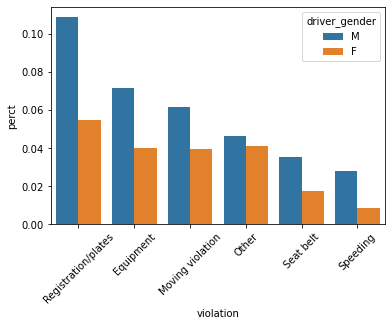

In [141]:
p = sns.barplot(x='violation', y='perct', hue='driver_gender', data=gender_violation)
_ = plt.setp(p.get_xticklabels(), rotation=45)

#### It appears that regardless of the violation committed that Males have a higher search rate than Females

## What happens during a search?

In [144]:
ri.search_conducted.value_counts()

False    83229
True      3307
Name: search_conducted, dtype: int64

In [146]:
# Examine what the possible outcomes are for a conducted search
# include dropna=False to confirm we get the same number as given by "False" for search_conducted
ri.search_type.value_counts(dropna=False)

NaN                                                         83229
Incident to Arrest                                           1290
Probable Cause                                                924
Inventory                                                     219
Reasonable Suspicion                                          214
Protective Frisk                                              164
Incident to Arrest,Inventory                                  123
Incident to Arrest,Probable Cause                             100
Probable Cause,Reasonable Suspicion                            54
Probable Cause,Protective Frisk                                35
Incident to Arrest,Inventory,Probable Cause                    35
Incident to Arrest,Protective Frisk                            33
Inventory,Probable Cause                                       25
Protective Frisk,Reasonable Suspicion                          19
Incident to Arrest,Inventory,Protective Frisk                  18
Incident t

There are five 'base' categories and then combinations of these base categories
For example: 'Incident to Arrest,Inventory' is a combination where two base types occured
In order to determine ALL occurences where for example "Inventory" occured we need to examine any result that contains that string

In [153]:
# Create column to return True is string is found and False if not found OR it has a missing value
ri['inventory'] = ri.search_type.str.contains('Inventory', na=False)

In [154]:
# Calculate the number of searches that included an Inventory
ri['inventory'].sum()

441

In [159]:
# To get the percentage of searches that had an Inventory we need to look at the .mean() of only those rows where a search was conducted
ri[ri.search_conducted == True]['inventory'].mean() * 100

13.335349259147264

In [160]:
# Look at the affect of gender on the 'Inventory' type search
ri[ri.search_conducted == True].groupby('driver_gender').inventory.mean()

driver_gender
F    0.175439
M    0.126622
Name: inventory, dtype: float64

In [161]:
# Do this for the other base categories of search
ri['IncidentToArrest'] = ri.search_type.str.contains('Incident to Arrest', na=False)

In [162]:
ri['ProbableCause'] = ri.search_type.str.contains('Probable Cause', na=False)

In [163]:
ri['ReasonableSuspicion'] = ri.search_type.str.contains('Reasonable Suspicion', na=False)

In [165]:
ri['ProtectiveFrisk'] = ri.search_type.str.contains('Protective Frisk', na=False)

In [169]:
# Now create a dataframe with percentages by gender for type
incidents = ri[ri.search_conducted == True].groupby('driver_gender')[['inventory','IncidentToArrest','ProbableCause','ReasonableSuspicion','ProtectiveFrisk']].mean().reset_index()

In [170]:
incidents.head()

,driver_gender,inventory,IncidentToArrest,ProbableCause,ReasonableSuspicion,ProtectiveFrisk
0,F,0.175439,0.546053,0.326754,0.059211,0.074561
1,M,0.126622,0.484742,0.367941,0.101017,0.094353


In [173]:
incidents_melt = pd.melt(incidents, id_vars=['driver_gender'], value_vars=['inventory','IncidentToArrest','ProbableCause','ReasonableSuspicion','ProtectiveFrisk'], var_name='SearchType', value_name='percent')

In [174]:
incidents_melt.head()

,driver_gender,SearchType,percent
0,F,inventory,0.175439
1,M,inventory,0.126622
2,F,IncidentToArrest,0.546053
3,M,IncidentToArrest,0.484742
4,F,ProbableCause,0.326754


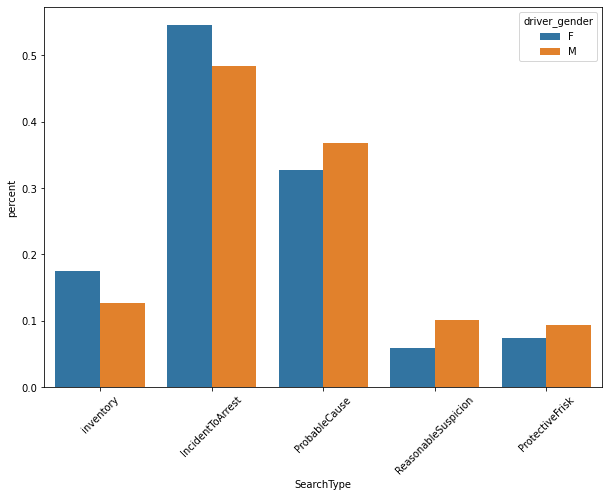

In [177]:
fig, ax = plt.subplots(figsize=(10,7))
p = sns.barplot(x='SearchType', y='percent', data=incidents_melt, hue='driver_gender')
_ = plt.setp(p.get_xticklabels(), rotation=45)

In [115]:
ri.district.unique()

array(['Zone X4', 'Zone K3', 'Zone X1', 'Zone X3', 'Zone K1', 'Zone K2'],
      dtype=object)

In [116]:
ri[ri.district == 'Zone K1'].is_arrested.mean()

0.024349083895853423

In [117]:
ri.groupby('district')['is_arrested'].mean()

district
Zone K1    0.024349
Zone K2    0.030801
Zone K3    0.032311
Zone X1    0.023494
Zone X3    0.034871
Zone X4    0.048038
Name: is_arrested, dtype: float64

In [121]:
gender_zone = ri.groupby(['driver_gender','district']).is_arrested.mean()\
.rename('perct')\
.mul(100)\
.reset_index()\
.sort_values('perct', ascending=False)

In [122]:
gender_zone.head()

,driver_gender,district,perct
11,M,Zone X4,4.995582
5,F,Zone X4,4.214906
10,M,Zone X3,3.816592
8,M,Zone K3,3.496112
7,M,Zone K2,3.428526


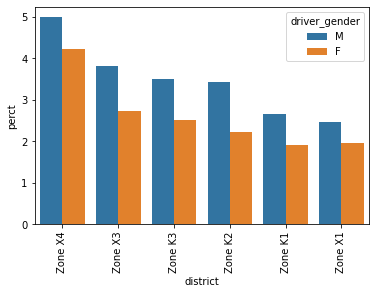

In [142]:
p = sns.barplot(x='district', y='perct', hue='driver_gender',data=gender_zone)
k = plt.setp(p.get_xticklabels(), rotation=90)